In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import Axes

In [2]:
def get_full_df(misinfotext_path: str, fakespeak_path: str):
    def get_years_dfs():
        misinfotext_file = pd.ExcelFile(misinfotext_path)
        
        for sheet in misinfotext_file.sheet_names:
            if not "_proportion" in sheet:
                continue

            df = pd.read_excel(misinfotext_file, sheet_name=sheet)
            df["year"] = (sheet.replace("_proportion", ""))
            yield df
        
        fakespeak_file = pd.ExcelFile(fakespeak_path)
        
        for sheet in fakespeak_file.sheet_names:
            if not "_proportion" in sheet:
                continue

            df = pd.read_excel(fakespeak_file, sheet_name=sheet)
            df["year"] = (sheet.replace("_proportion", ""))
            yield df
    
    return pd.concat(get_years_dfs())

In [3]:
df = get_full_df(
    misinfotext_path="./data/MisInfoText/Analysis_output/MisInfoText_quotes.xlsx",
    fakespeak_path="./data/Fakespeak-ENG/Analysis_output/Fakespeak_quotes.xlsx",
)
df.head()

,factcheckURL,proportion_quote_words_to_total_words,year,ID
0,http://www.politifact.com/truth-o-meter/statem...,0.777778,2007,NaN
0,http://www.politifact.com/truth-o-meter/statem...,0.009921,2008,NaN
1,http://www.politifact.com/truth-o-meter/statem...,0.009789,2008,NaN
2,http://www.politifact.com/truth-o-meter/statem...,0.576982,2008,NaN
3,http://www.politifact.com/truth-o-meter/statem...,0.080262,2008,NaN


In [4]:
# df["proportion_quote_words_to_total_words"].plot(kind="scatter")

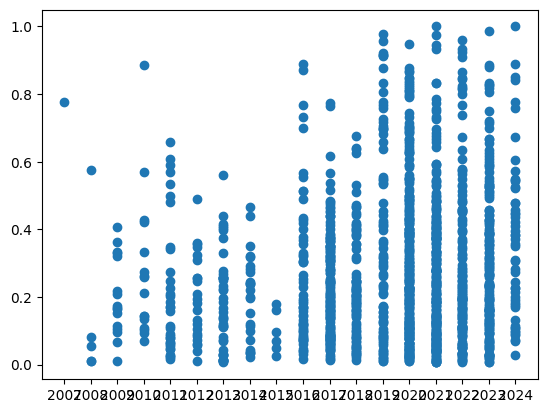

In [5]:
plt.scatter(x=df["year"], y=df["proportion_quote_words_to_total_words"])

<Axes: >

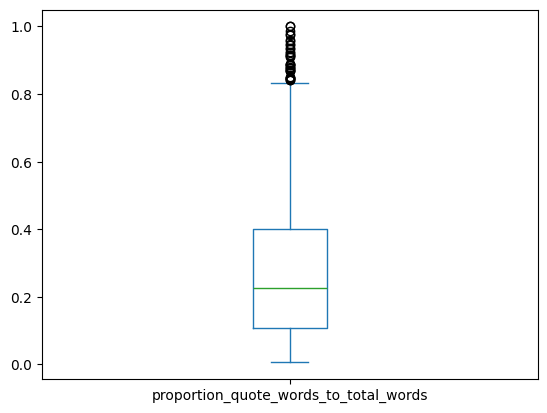

In [6]:
# plt.boxplot(x=df["year"], y=df["proportion_quote_words_to_total_words"])
df["proportion_quote_words_to_total_words"].plot(kind="box")

In [12]:
grouped_by_year = df.groupby("year")
d = dict((year, list(grouped_by_year.get_group(year)["proportion_quote_words_to_total_words"])) for year in grouped_by_year.groups)
d

{'2007': [0.7777777777777778],
 '2008': [0.00992063492063492,
  0.009789156626506024,
  0.5769817073170732,
  0.08026208026208029,
  0.05517241379310345],
 '2009': [0.3294117647058823,
  0.06820809248554914,
  0.216650898770104,
  0.4074074074074074,
  0.01211305518169583,
  0.2074688796680498,
  0.1721991701244813,
  0.1668137687555163,
  0.1645569620253164,
  0.1066079295154185,
  0.3333333333333334,
  0.1535226077812829,
  0.115546218487395,
  0.3626943005181347,
  0.09747292418772564,
  0.3218085106382979],
 '2010': [0.8864864864864865,
  0.0706401766004415,
  0.4213483146067416,
  0.3338391502276176,
  0.1016042780748663,
  0.2602040816326531,
  0.2747252747252747,
  0.1436170212765958,
  0.1356628982528263,
  0.1444866920152091,
  0.09335038363171355,
  0.2125,
  0.1087344028520499,
  0.2627291242362525,
  0.5696316262353999,
  0.4285714285714285],
 '2011': [0.1707317073170732,
  0.0783410138248848,
  0.04724409448818898,
  0.2017200938232995,
  0.02688172043010753,
  0.157831325

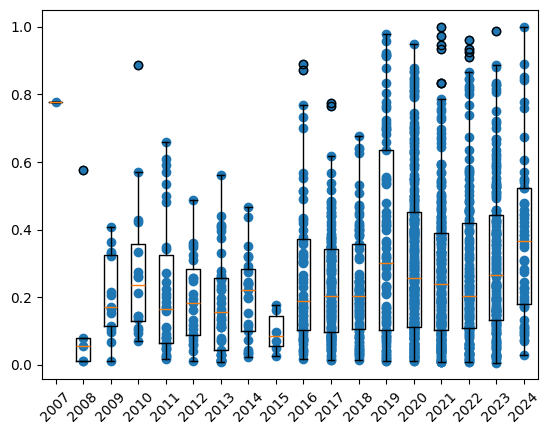

In [23]:
years = list(d.keys())
positions = list(range(len(years)))
mapping = {y: i for i, y in enumerate(years)}
x_pos = df["year"].map(mapping)

fig, ax = plt.subplots()
ax.scatter(x_pos, df["proportion_quote_words_to_total_words"])
ax.boxplot(list(d.values()), positions=positions)
ax.set_xticks(positions)
ax.set_xticklabels(years)
ax.tick_params(axis="x", rotation=45)